# Deep Learning 

In [1]:
import numpy as np
import pandas as pd

In [2]:
def sigmoid(x): #SIGMOID function
    return 1/(1+np.exp(-x))

In [3]:
def passon(features,weights,bias):
    return sigmoid(np.dot(features,weights)+bias)

In [4]:
def error(y,output):
    return -(y*np.log(output)+(1-y)*log(1-output))

In [6]:
def gd(x,y,weights,bias,learnrate): #gradient descent for 2 variables- one step
    output = passon(x,weights,bias)
    diff = y-output
    weights = weights+learnrate*diff*x
    bias = bias + learnrate*diff
    return weights,bias

In [7]:
#EXAMPLE OF A NEURAL NETWORK
import argparse
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
import json 
class classify_network(nn.Module):
    def __init__(self):
        super().__init__()
        #defining the input layer, having initial size of the image
        self.fc1 = nn.Linear(2208, 850)
       
        #defining the last layer, having output as 102-the types of flowers present
        self.fc2 = nn.Linear(850,102)
        #defining dropout
        self.dropout = nn.Dropout(p=0.35)
    
    def forward(self,x):
        x = self.dropout(F.relu(self.fc1(x)))
        #no dropouts for the output layer
        x = F.log_softmax(self.fc2(x),dim=1)
        return x
    

In [ ]:
#using nn.sequential


In [ ]:
#Assignment question: Define your own neural network


In [9]:
#TRANSFER LEARNING-DOWNLOADING
model=  models.vgg16(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\Govind Thakur/.cache\torch\checkpoints\vgg16-397923af.pth
100%|████████████████████████████████████████████████████████████████| 553433881/553433881 [09:11<00:00, 952956.66it/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

### Trying out the MNIST dataset
Lets try to train our own model on the MNIST dataset, where our model is expected to identify hand-written digits in the dataset. The digits are written in all kinds of handwritings, good and bad. 

Let us begin by getting our dataset. We will download it using the MNIST function in pytorch's datasets library.

In [1]:
import torch
import numpy as np
from torch import nn
import torch.nn.functional as F
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# convert data to torch.FloatTensor
transform = transforms.ToTensor()
# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)
# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

Now that we have downloaded the dataset, lets have a look at our images.

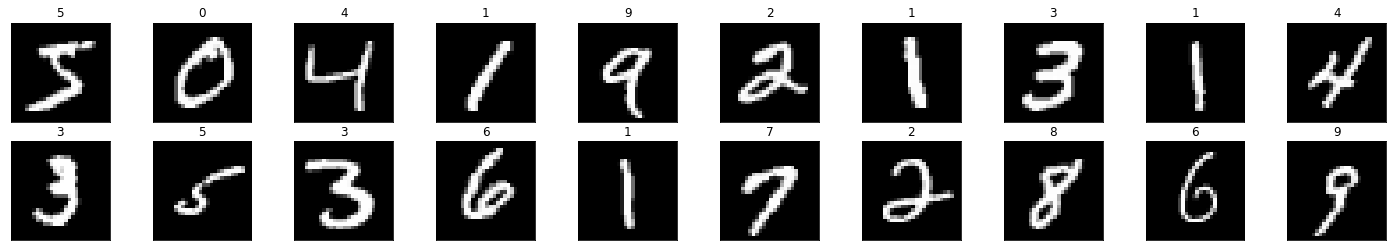

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

Now to define the model

In [4]:
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class GTNet(nn.Module):
    def __init__(self):
        super(GTNet, self).__init__()
        # number of hidden nodes in each layer (512)
        hidden_1 = 512
        hidden_2 = 512
        # linear layer (784 -> hidden_1)
        self.fc1 = nn.Linear(28 * 28, hidden_1)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(hidden_2, 10)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # add dropout layer
        x = self.dropout(x)
        # add output layer
        x = self.fc3(x)
        return x

# initialize the NN
model = GTNet()
print(model)

GTNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)


We need to let the model know where its going wrong in classification. In order to do that, we need to set a 'criterion', ie the error function, which generates the error to be reduced.

Also, let us define our optimizer, which will help the model improve bit by bit

In [5]:
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Now comes the training of the network. currently, the epochs are set to 10, but one may play around with that a bit, to further improve the model (50 is not a bad idea either, provided you have enough time)

In [6]:
n_epochs = 10

model.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
             
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.811344
Epoch: 2 	Training Loss: 0.324783
Epoch: 3 	Training Loss: 0.250937
Epoch: 4 	Training Loss: 0.204475
Epoch: 5 	Training Loss: 0.171577
Epoch: 6 	Training Loss: 0.147523
Epoch: 7 	Training Loss: 0.130863
Epoch: 8 	Training Loss: 0.116018
Epoch: 9 	Training Loss: 0.104194
Epoch: 10 	Training Loss: 0.095768


Now that we have trained our model, let's test it!

In [7]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.088047

Test Accuracy of     0: 98% (968/980)
Test Accuracy of     1: 99% (1125/1135)
Test Accuracy of     2: 96% (999/1032)
Test Accuracy of     3: 97% (986/1010)
Test Accuracy of     4: 96% (951/982)
Test Accuracy of     5: 97% (871/892)
Test Accuracy of     6: 96% (929/958)
Test Accuracy of     7: 96% (990/1028)
Test Accuracy of     8: 96% (944/974)
Test Accuracy of     9: 96% (973/1009)

Test Accuracy (Overall): 97% (9736/10000)


97% huh. Thats really good! But let's have a bit more fun, see exactly how well our Network does with our own eyes.

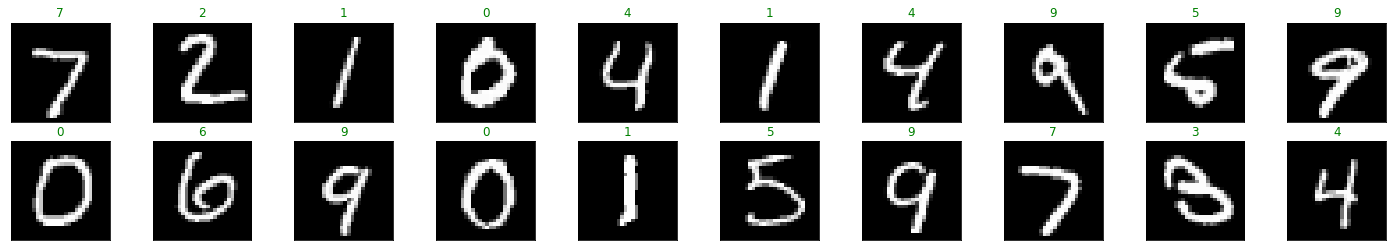

In [11]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{}".format(str(preds[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))